In [3]:
import pathlib

In [4]:
data_dir = pathlib.Path('./uvas')

In [5]:
len(list(data_dir.glob('*/*.JPG')))

1600

In [6]:
subfolders = [f.name for f in data_dir.iterdir() if f.is_dir()]
subfolders

['BlackRot', 'HealthyGrapes', 'LeafBlight', 'BlackMeasles']

In [7]:
from PIL import Image

In [8]:
leafblight = list(data_dir.glob('LeafBlight/*'))

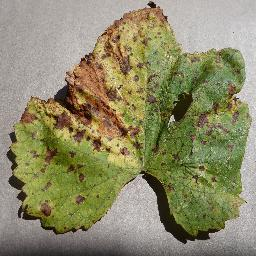

In [7]:
Image.open(str(leafblight[0]))

In [9]:
import numpy as np

In [10]:
for subfolder in subfolders:
    path = data_dir / subfolder
    images = list(path.glob('*.JPG'))
    print(f'Classe {subfolder} tem {len(images)} imagens')

    if images:
        img = Image.open(str(images[0]))
        img_array = np.array(img)
        print(f'Dimensões da primeira marge em {subfolder}: {img_array.shape}')

Classe BlackRot tem 400 imagens
Dimensões da primeira marge em BlackRot: (256, 256, 3)
Classe HealthyGrapes tem 400 imagens
Dimensões da primeira marge em HealthyGrapes: (256, 256, 3)
Classe LeafBlight tem 400 imagens
Dimensões da primeira marge em LeafBlight: (256, 256, 3)
Classe BlackMeasles tem 400 imagens
Dimensões da primeira marge em BlackMeasles: (256, 256, 3)


In [11]:
import tensorflow as tf

In [12]:
tf.test.gpu_device_name()

I0000 00:00:1755365297.066914  128000 gpu_device.cc:2020] Created device /device:GPU:0 with 9442 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


'/device:GPU:0'

In [13]:
batch_size = 64
altura = 256
largura = 256

In [14]:
treino = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=568,
    image_size=(altura, largura),
    batch_size=batch_size,
)

Found 1600 files belonging to 4 classes.


Using 1280 files for training.


I0000 00:00:1755365298.216133  128000 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9442 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


In [15]:
validacao = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=568,
    image_size=(altura, largura),
    batch_size=batch_size,
)

Found 1600 files belonging to 4 classes.
Using 320 files for validation.


In [16]:
treino.class_names

['BlackMeasles', 'BlackRot', 'HealthyGrapes', 'LeafBlight']

In [17]:
tf.random.set_seed(424242)

In [18]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256, 256, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax),
])

In [19]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [20]:
epocas = 10

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas,
)

Epoch 1/10


2025-08-16 14:28:29.302043: I external/local_xla/xla/service/service.cc:163] XLA service 0x7af4b0013b70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-08-16 14:28:29.302065: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-08-16 14:28:29.318190: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-08-16 14:28:29.373900: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91100


17/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3097 - loss: 87.9230

I0000 00:00:1755365310.994429  128575 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.2812 - loss: 53.1697 - val_accuracy: 0.2531 - val_loss: 14.7200
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4070 - loss: 7.0517 - val_accuracy: 0.2344 - val_loss: 8.5406
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5586 - loss: 2.7334 - val_accuracy: 0.7219 - val_loss: 1.2839
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6891 - loss: 1.4255 - val_accuracy: 0.7500 - val_loss: 0.9501
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6953 - loss: 1.3391 - val_accuracy: 0.6750 - val_loss: 2.3242
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6773 - loss: 1.9440 - val_accuracy: 0.6719 - val_loss: 2.0596
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6047 - loss: 2.6472 - val_accuracy: 0.7219 - val_loss: 1.5612
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7766 - loss: 0.8242 - val_accuracy: 0.7719 - val_loss: 

In [21]:
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 196608)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    25,165,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,499,406 (288.01 MB)

 Trainable params: 25,166,468 (96.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 50,332,938 (192.00 MB)

In [22]:
import matplotlib.pyplot as plt

In [23]:
def plota_resultados(history, epocas):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    intervalo_epocas = range(epocas)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)

    plt.plot(intervalo_epocas, acc, 'r', label='Acurácia do Treino')
    plt.plot(intervalo_epocas, val_acc, 'b', label='Acurácia do Validação')
    plt.legend(loc="lower right")

    plt.subplot(1, 2, 2)

    plt.plot(intervalo_epocas, loss, 'r', label='Perda do Treino')
    plt.plot(intervalo_epocas, val_loss, 'b', label='Perda do Validação')
    plt.legend(loc="upper right")

    plt.show()

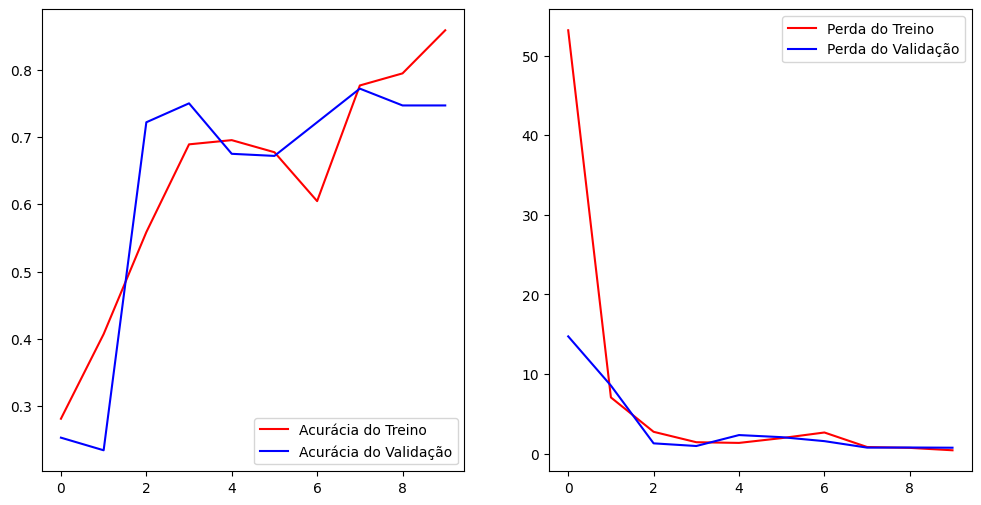

In [24]:
plota_resultados(history, epocas)

In [25]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256, 256, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax),
])

In [26]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [27]:
epocas = 10

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas,
)

Epoch 1/10


2025-08-16 14:28:53.977927: E external/local_xla/xla/service/slow_operation_alarm.cc:73] Trying algorithm eng57{k2=0,k13=2,k14=2,k18=1,k23=0} for conv (f32[32,3,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,3,256,256]{3,2,1,0}, f32[64,32,254,254]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]} is taking a while...
2025-08-16 14:28:54.014928: E external/local_xla/xla/service/slow_operation_alarm.cc:140] The operation took 1.037067431s
Trying algorithm eng57{k2=0,k13=2,k14=2,k18=1,k23=0} for conv (f32[32,3,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,3,256,256]{3,2,1,0}, f32[64,32,254,254]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter

20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 147ms/step - accuracy: 0.3758 - loss: 2.0175 - val_accuracy: 0.7750 - val_loss: 0.7985
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.7609 - loss: 0.6041 - val_accuracy: 0.8750 - val_loss: 0.3815
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.8734 - loss: 0.3398 - val_accuracy: 0.8094 - val_loss: 0.4278
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9062 - loss: 0.2705 - val_accuracy: 0.8938 - val_loss: 0.2810
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9555 - loss: 0.1571 - val_accuracy: 0.9031 - val_loss: 0.2675
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9719 - loss: 0.1073 - val_accuracy: 0.9125 - val_loss: 0.2472
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.9883 - loss: 0.0692 - val_accuracy: 0.9344 - val_loss: 0.1857
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.9867 - loss: 0.0572 - val_accuracy: 0.9469 - val_loss: 

In [28]:
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    15,745,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,267,438 (180.31 MB)

 Trainable params: 15,755,812 (60.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 31,511,626 (120.21 MB)

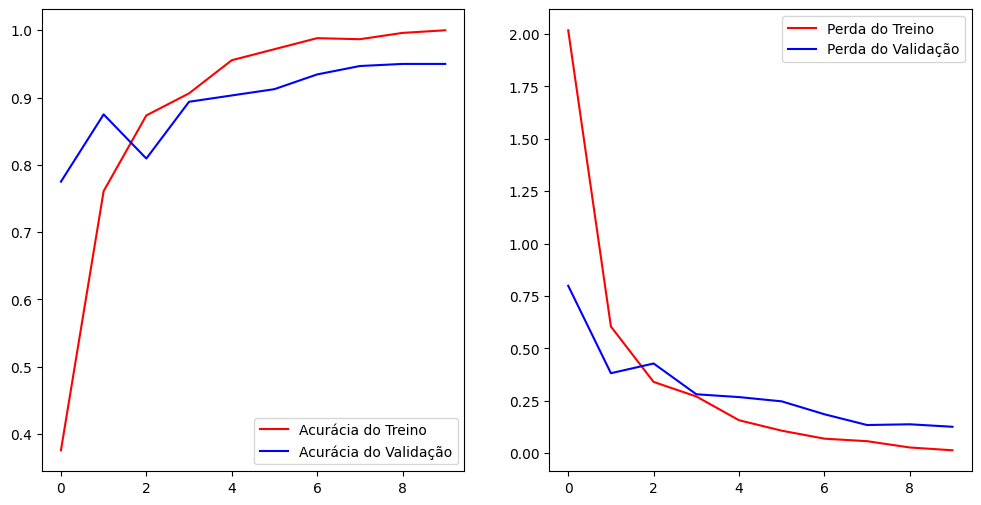

In [29]:
plota_resultados(history, epocas)

In [30]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>=0.93):
            print('\n Alcançamos 93% de acurácia. Parando o treinamento')
            self.model.stop_training = True

callbacks = myCallback()

In [31]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256, 256, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax),
])

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [32]:
epocas = 10

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas,
    callbacks=[callbacks],
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.3352 - loss: 2.9155 - val_accuracy: 0.4031 - val_loss: 1.1047
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.7141 - loss: 0.6919 - val_accuracy: 0.8781 - val_loss: 0.3494
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.8773 - loss: 0.3094 - val_accuracy: 0.9187 - val_loss: 0.2581
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9295 - loss: 0.1961
 Alcançamos 93% de acurácia. Parando o treinamento
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.9461 - loss: 0.1642 - val_accuracy: 0.9281 - val_loss: 0.1775


In [33]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256, 256, 3)),
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax),
])

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [34]:
epocas = 50

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas,
)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.3633 - loss: 2.8362 - val_accuracy: 0.6844 - val_loss: 0.9114
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.7766 - loss: 0.5975 - val_accuracy: 0.8656 - val_loss: 0.3807
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.8883 - loss: 0.3022 - val_accuracy: 0.9094 - val_loss: 0.2627
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.9445 - loss: 0.1550 - val_accuracy: 0.8906 - val_loss: 0.2996
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.9555 - loss: 0.1392 - val_accuracy: 0.9250 - val_loss: 0.2168
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.9937 - loss: 0.0514 - val_accuracy: 0.9281 - val_loss: 0.1907
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.9945 - loss: 0.0346 - val_accuracy: 0.9312 - val_loss: 0.1894
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.9992 - loss: 0.0159 - val_accuracy: 0.9344 - v

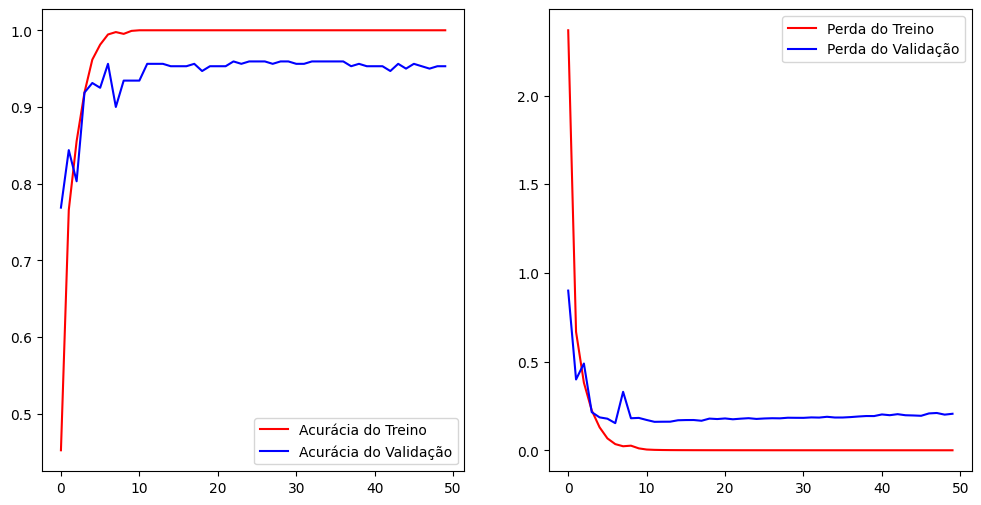

In [34]:
plota_resultados(history, epocas)

In [35]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.05),
])

In [36]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(256, 256, 3)),
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax),
])

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [37]:
epocas = 50

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas,
)

Epoch 1/50
20/20 [==============================] - 13s 624ms/step - loss: 2.5513 - accuracy: 0.3766 - val_loss: 1.5624 - val_accuracy: 0.3656
Epoch 2/50
20/20 [==============================] - 12s 595ms/step - loss: 0.7355 - accuracy: 0.6734 - val_loss: 1.3985 - val_accuracy: 0.6156
Epoch 3/50
20/20 [==============================] - 12s 586ms/step - loss: 0.4536 - accuracy: 0.8234 - val_loss: 2.4289 - val_accuracy: 0.5656
Epoch 4/50
20/20 [==============================] - 12s 592ms/step - loss: 0.3954 - accuracy: 0.8469 - val_loss: 1.1632 - val_accuracy: 0.6906
Epoch 5/50
20/20 [==============================] - 12s 609ms/step - loss: 0.2723 - accuracy: 0.8953 - val_loss: 1.0050 - val_accuracy: 0.7469
Epoch 6/50
20/20 [==============================] - 11s 569ms/step - loss: 0.2539 - accuracy: 0.8961 - val_loss: 0.8293 - val_accuracy: 0.7656
Epoch 7/50
20/20 [==============================] - 11s 570ms/step - loss: 0.2290 - accuracy: 0.9086 - val_loss: 1.2292 - val_accuracy: 0.7344

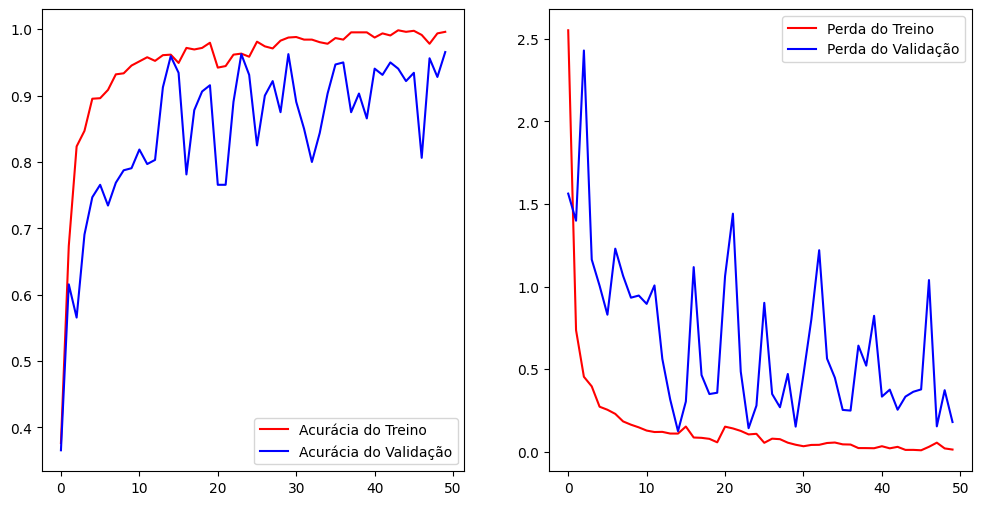

In [38]:
plota_resultados(history, epocas)

In [39]:
modelo.save('modelo_apos_aumento.h5')

/home/henrique/Desenvolvimento/repo/pessoal/FormacaoAluraKeras/curso2/.venv/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
input_shape = (256, 256, 3)

In [41]:
modelo_base = tf.keras.applications.InceptionV3(input_shape=input_shape, include_top=False, weights='imagenet')

In [42]:
modelo_base.trainable = False

In [43]:
modelo_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_8 (Conv2D)           (None, 127, 127, 32)         864       ['input_6[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d_8[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_normalizati

In [44]:
rescale = tf.keras.layers.Rescaling(1./255)
treino = treino.map(lambda x, y: (rescale(x), y))
validacao = validacao.map(lambda x, y: (rescale(x), y))

In [45]:
ultima_camada = modelo_base.get_layer('mixed7')
print('ultima_camada', ultima_camada.output_shape)
ultima_saida = ultima_camada.output

ultima_camada (None, 14, 14, 768)


In [46]:
x = tf.keras.layers.Flatten()(ultima_saida)

x = tf.keras.layers.Dense(1_024, activation='relu')(x)

x = tf.keras.layers.Dropout(0.2)(x)

x = tf.keras.layers.Dense(4, activation='softmax')(x)

modelo = tf.keras.Model(inputs=modelo_base.input, outputs=x)

In [47]:
modelo.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_8 (Conv2D)           (None, 127, 127, 32)         864       ['input_6[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 127, 127, 32)         96        ['conv2d_8[0][0]']            
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 127, 127, 32)         0         ['batch_normalization[0][0

In [48]:
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [49]:
epocas = 20

history = modelo.fit(
    treino,
    validation_data=validacao,
    epochs=epocas,
)

Epoch 1/20
20/20 [==============================] - 33s 2s/step - loss: 8.1933 - accuracy: 0.6391 - val_loss: 1.7964 - val_accuracy: 0.8500
Epoch 2/20
20/20 [==============================] - 31s 2s/step - loss: 0.2088 - accuracy: 0.9688 - val_loss: 0.1165 - val_accuracy: 0.9781
Epoch 3/20
20/20 [==============================] - 31s 2s/step - loss: 0.0328 - accuracy: 0.9922 - val_loss: 0.0816 - val_accuracy: 0.9812
Epoch 4/20
20/20 [==============================] - 31s 2s/step - loss: 0.0224 - accuracy: 0.9937 - val_loss: 0.0833 - val_accuracy: 0.9812
Epoch 5/20
20/20 [==============================] - 31s 2s/step - loss: 0.0309 - accuracy: 0.9930 - val_loss: 0.0694 - val_accuracy: 0.9750
Epoch 6/20
20/20 [==============================] - 31s 2s/step - loss: 0.0166 - accuracy: 0.9945 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 7/20
20/20 [==============================] - 33s 2s/step - loss: 0.0121 - accuracy: 0.9961 - val_loss: 0.0609 - val_accuracy: 0.9812
Epoch 8/20
20/20 [==

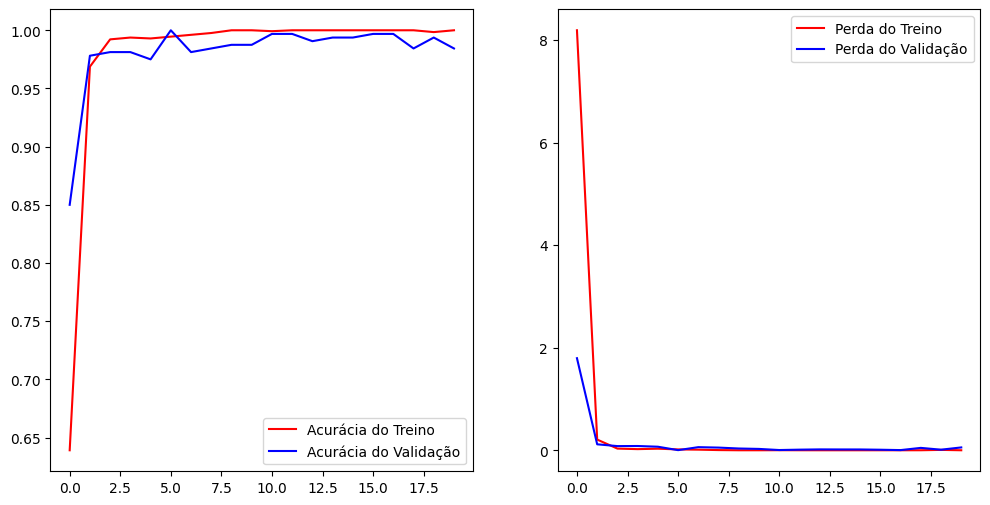

In [50]:
plota_resultados(history, epocas)

In [51]:
modelo.save('modelo_transferencia_de_aprendizado.h5')

In [ ]:
modelo.save('modelo_final_transferencia_de_aprendizado.h5', include_optimizer=False)

In [ ]:
modelo.save_weights('pesos.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(modelo)

In [ ]:
converter.optimizations = [tf.lite.Otimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]

In [52]:
modelo_tfile_quantizado = converter.convert()

NameError: name 'converter' is not defined

In [ ]:
with open('modelo_quantizado16bits.tfile', 'wb') as f:
    f.write(modelo_tfile_quantizado)